# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

file_url = './foodhub_order.csv'

In [3]:
# read the data
df = pd.read_csv(file_url)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# use shape to check on number of rows and columns
df.shape

(1898, 9)

#### Observations:
Result: 1898 rows, 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

- Both IDs (order and customer) are integer, which is expected. Also as integer are food_preparation_time and delivery_time.
- Cost of the order is as of float64, which is expected (a meal's cost does not have to be whole dollar only).
- restaurant_name, cuisine_type and day_of_the_week are imported as object, which probably means they are imported as string.
- Rating is imported as string as well, but in reality, the rating should be numerical (1-5). We need to check why this is the case.

In [6]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

Existing values in this column is 5, 4, 3 (assuming stars) and "Not given", hence imported as string. We will deal with it in the following steps.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

It looks like there are no NULL nor NA values exists.

However, looking at the imported dataframe again, the first two **rating** entries are "Not given". Is this missing value, or is this a valid choice? Chances are, it is missing not because of data collection error, but like a user consciously skipped putting in any star rating. In this case, "Not given" is a valid choice. This has a couple of complications:

1. The entries in 'rating' is categorical.
2. But we still want rating in numerical format for some other analysis.

In [8]:
# 1. Make rating's "Not given" to become null/NA
# 2. Change the rating column to be int64
# Assign the result into a new column.

df['rating_num'] = df['rating'].replace("Not given", np.nan).astype('float')

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0
rating_num,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0


#### Observations:

For food preparation time:

- Minimum: 20 minutes
- Average (mean): 27.37 minutes
- Maximum: 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here
print(df['rating'].value_counts())
print(f"Total orders not rated (as %): {df[df.rating == 'Not given'].size / df.size:.2%}")

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
Total orders not rated (as %): 38.78%


#### Observations:

Ans: 736 records had ratings "Not given" (38.78%).

### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [11]:
# For sorting purpose, let us create a list of alphabetically-sorted restaurant names, as well as a list of alphabetically-sorted cuisine types
restaurant_names = df.restaurant_name.sort_values().unique().tolist()
cuisine_types = df.cuisine_type.sort_values().unique().tolist()

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### *Order ID*:

In [12]:
# Order ID

df['order_id'].nunique()

1898

#### Observations:

There are 1898 unique order_id in the dataset. Since the size of the dataset is indeed 1898 rows, this means order_id is the unique identifier. 

#### *Customer ID*:

In [13]:
# Customer ID

print(f"Number of unique customer_id: {df['customer_id'].nunique()}")
print(f"number of customers with more than 1 order: {df.groupby(['customer_id'], as_index=False).agg(num_of_orders=('order_id', 'size')).query('num_of_orders > 1').size}")

Number of unique customer_id: 1200
number of customers with more than 1 order: 832


#### Observations:

There are 1200 unique customer_id in the dataset. 832 of them placed more than 1 order.

#### *Restaurant Name*:

In [14]:
df.restaurant_name.nunique()

178

#### Observations:

We have a total of 178 restaurants here in this dataset. Plotting graphs with such large number on any axis is not practical. That does not mean we cannot dive a bit further into the dataset though. How about if we look at how many orders does each restaurant received?

In [15]:
restaurant_orders = df.groupby('restaurant_name', as_index=False).agg(num_of_orders=('order_id', 'size')).sort_values(by=['num_of_orders'], ascending=False)
print(restaurant_orders)

               restaurant_name  num_of_orders
136                Shake Shack            219
153          The Meatball Shop            132
21           Blue Ribbon Sushi            119
20   Blue Ribbon Fried Chicken             96
109                       Parm             68
..                         ...            ...
85                       Klong              1
83           Kambi Ramen House              1
77                  Il Bambino              1
76                 Hunan Manor              1
89               Lamarca Pasta              1

[178 rows x 2 columns]


Some restaurants (e.g. Shake Shack) received a lot of orders (219 orders), while some restaurants received only 1 order. To dive deeper, have how many restaurants received only 1 order in the whole population?

In [16]:
order_size = restaurant_orders.groupby(['num_of_orders']).agg(num_of_restaurants=('num_of_orders', 'size'))
order_size['%'] = 100 * (order_size['num_of_restaurants'] / order_size['num_of_restaurants'].sum())
print(order_size.head(5))
print(f"{order_size['%'].head(5).sum():.2f}% of the restaurants placed only 5 or fewer orders.")

               num_of_restaurants          %
num_of_orders                               
1                              50  28.089888
2                              23  12.921348
3                              23  12.921348
4                              13   7.303371
5                              11   6.179775
67.42% of the restaurants placed only 5 or fewer orders.


A majority of restaurants (67.42%, to be exact) placed only 5 or fewer orders. It means, for many restaurants in this dataset, their customers do not utilize the FoodHub platform very often. Assuming that these are not the restaurants' *only* orders, there are a couple of possibilities:
- Perhaps the restaurants themselves are underutilizing FoodHub, e.g. they have their own delivery service, or they have other delivery partners, thus advertising those other platforms over FoodHub.
- Or, perhaps customers do not like FoodHub's user experience, thus opting for using other platforms. (However, we do not have any data point in this dataset that can validate this hypothesis.)

Either way, it is a good idea to look at the ratings of these restaurants, to see if there is any correlation between the ratings and the number of orders.

(By the same token, restaurants with many orders with FoodHub could be due to the restaurants' popularity, or the restaurant only uses FoodHub as delivery platform, thus no choice. Again, it is a good idea to look at the ratings of these restaurants, to see if there is any correlation between the ratings and the number of orders.)

For later analysis, let us tag the restaurants in the main dataset with the number of orders they received.

In [17]:
# Append the number of orders of each restaurant to the main dataset
df = df.merge(restaurant_orders, left_on='restaurant_name', right_on='restaurant_name')

#### *Cuisine Type*:

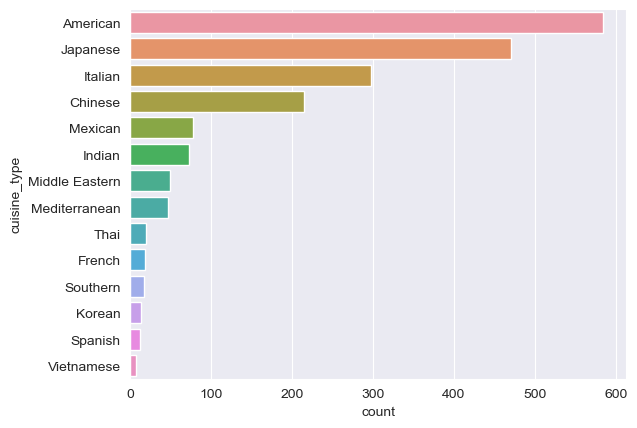

In [18]:
sns.countplot(data=df, y='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.show()

#### Observations:

For cuisine type, most people order American food, followed by Japanese, Italian and Chinese.

#### *Cost of the Order*:

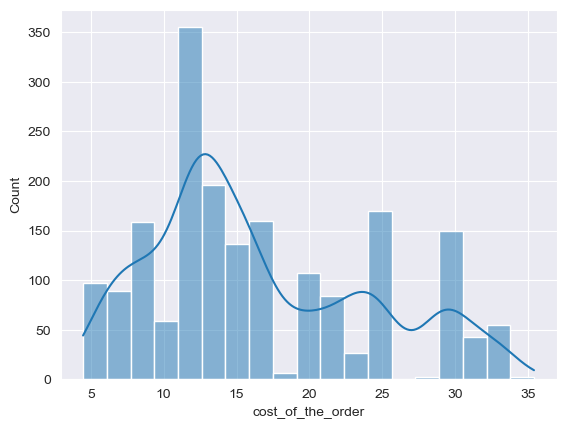

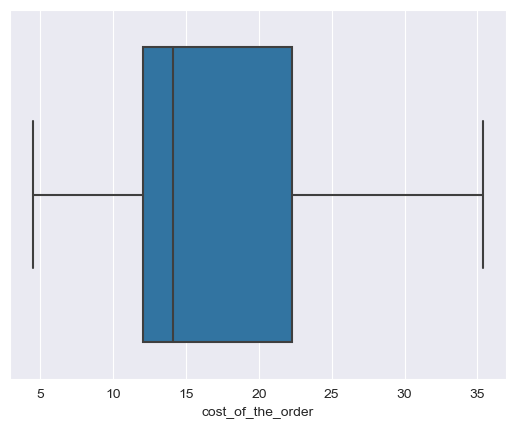

In [19]:
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

#### Observations:

Most people places order costing around 10-20 dollars, with cheapest as 5 dollars and most expensive as 35 dollars. The data seems right skewed, and there is no outliers as the graph's concern.

#### *Day of the Week*:

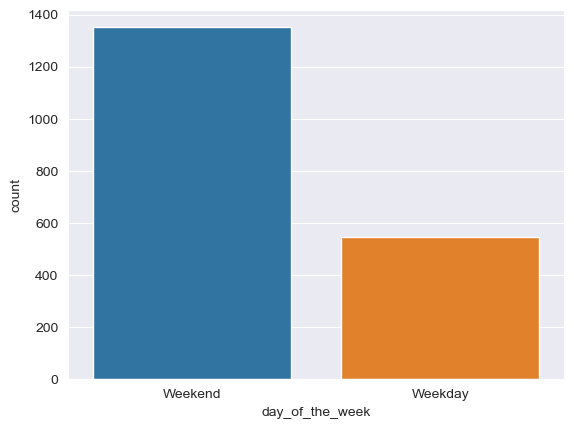

'71.18%'

In [20]:
sns.countplot(data=df, x='day_of_the_week')
plt.show()
f"{df[df.day_of_the_week == 'Weekend'].size / df.size:.2%}"

#### Observations:

Most orders were placed in the weekend (71.18%).

This is interesting - weekend orders should mostly be placed by residential customers (since most offices are off), while weekday orders would include business customers as well. This could be because the restaurants in this dataset are mostly located in residential areas, or the business customers are not using FoodHub as much as residential customers. However, since we do not have the order's destination (delivery address, or at least a proxy of it, like zipcode) in this dataset, we cannot confirm this hypothesis.

#### *Food Preparation Time*:

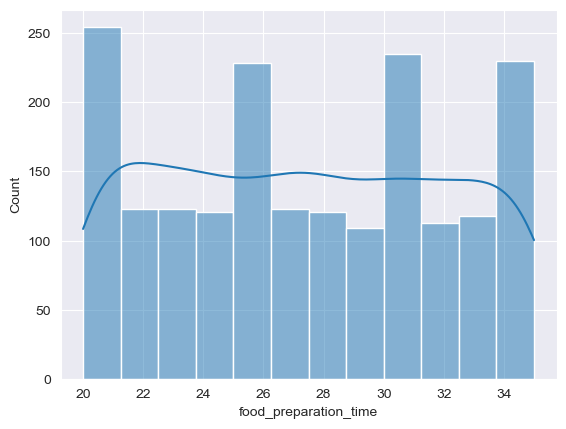

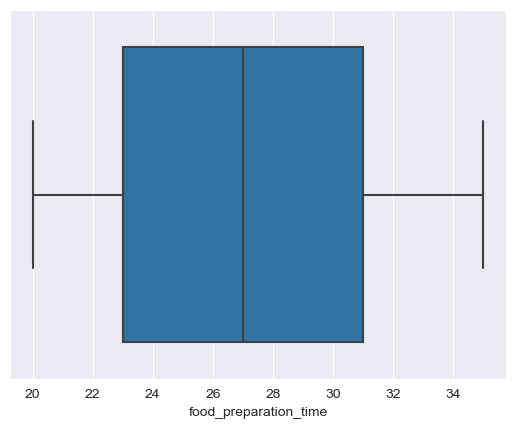

In [21]:
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

#### Observations:

Food preparation time appears to be pretty evenly distributed. 

#### *Delivery Time*:

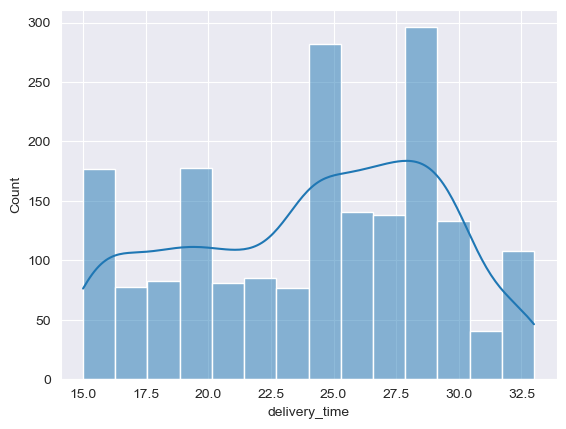

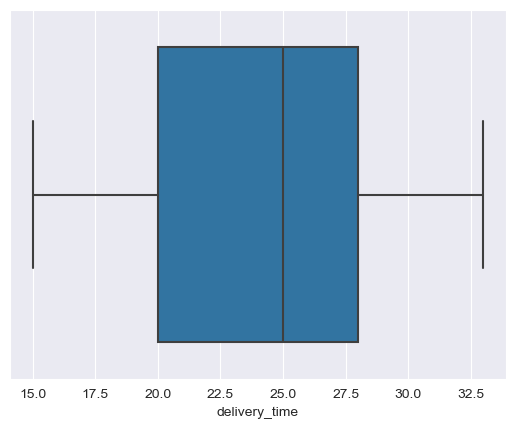

In [22]:
sns.histplot(data=df, x='delivery_time', kde=True)
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

Delivery time seems to be a bit left skewed, with the majority of orders needing about 25-30 minutes to deliver.

Just help further investigation, let us create a column of "total time", consisting of food preparation time and delivery time. This would be the actual time it takes for the order to be fulfilled.

In [23]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

df['total_time'].describe()

count    1898.000000
mean       51.533720
std         6.833603
min        35.000000
25%        47.000000
50%        52.000000
75%        56.000000
max        68.000000
Name: total_time, dtype: float64

#### Observations:

In average, it takes about 51 minutes for an order to actually be fulfilled. The fastest order took 35 minutes, while the slowest took a whopping 68 minutes. Taking more than an hour for an order to be fulfilled definitely is a long period to wait...

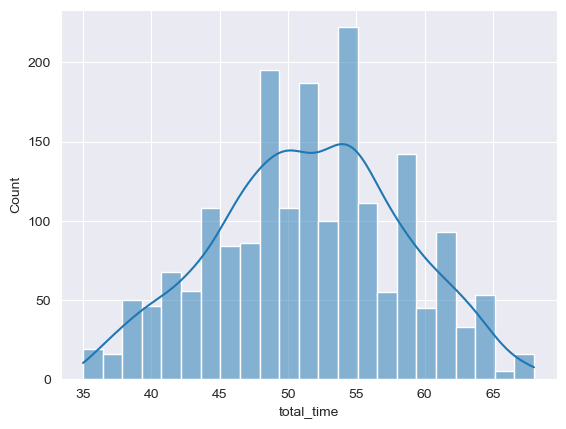

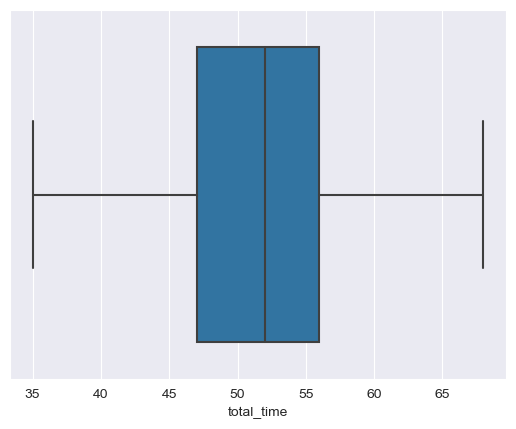

In [24]:
sns.histplot(data=df, x='total_time', kde=True)
plt.show()
sns.boxplot(data=df, x='total_time')
plt.show()

If we add up the food preparation time and delivery time to indicate the actual order's fulfillment time, the order fulfillment time is normally distributed.

#### *Rating*:

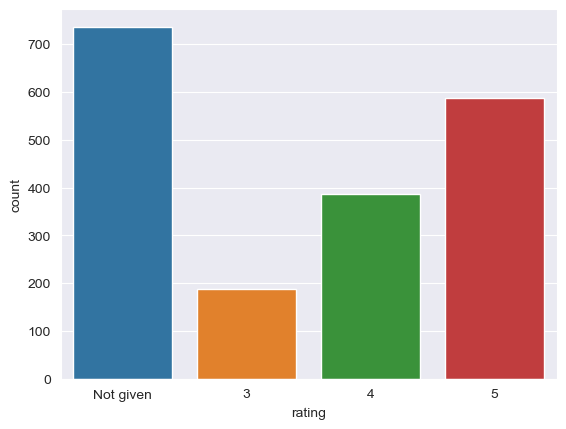

In [25]:
sns.countplot(data=df, x='rating', order=['Not given', '3', '4', '5']);

Many orders were not given a rating. For those that were given ratings, only a few got the lowest '3', which is still not bad - but perhaps the users were being polite.

Since there are so many orders without ratings, we will need to check the relationship between ratings and other variables later to determine its usefulness.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [26]:
df.value_counts('restaurant_name').head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [27]:
df[df.day_of_the_week == 'Weekend'].value_counts('cuisine_type').head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:

American is the most popular cuisine on weekends (415 orders)

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [28]:
print(f"Total number of orders costing more than $20: {df[df.cost_of_the_order > 20]['order_id'].nunique()}")
print(f"Percentage: {df[df.cost_of_the_order > 20]['order_id'].nunique() / df['order_id'].nunique():.2%}")

Total number of orders costing more than $20: 555
Percentage: 29.24%


#### Observations:

555 orders (29.24%) of the orders are more than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [29]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:

Mean delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [30]:
df.value_counts('customer_id').head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:

Here are the 3 customers ordering the most:

- 52832 ordered 13 times
- 47440 ordered 10 times
- 83287 ordered 9 times

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


First, let us look at whether any numerical values have correlation

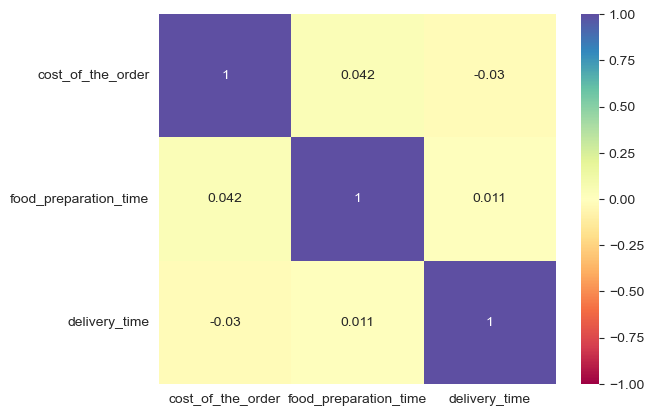

In [31]:
sns.heatmap(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

Basically, there is no strong correlation between any data within the original dataframe (excluding the columns added during the process). This means, we should focus on relationships between numerical data and categorical data.

#### *Relationship between cuisine and day of the week*

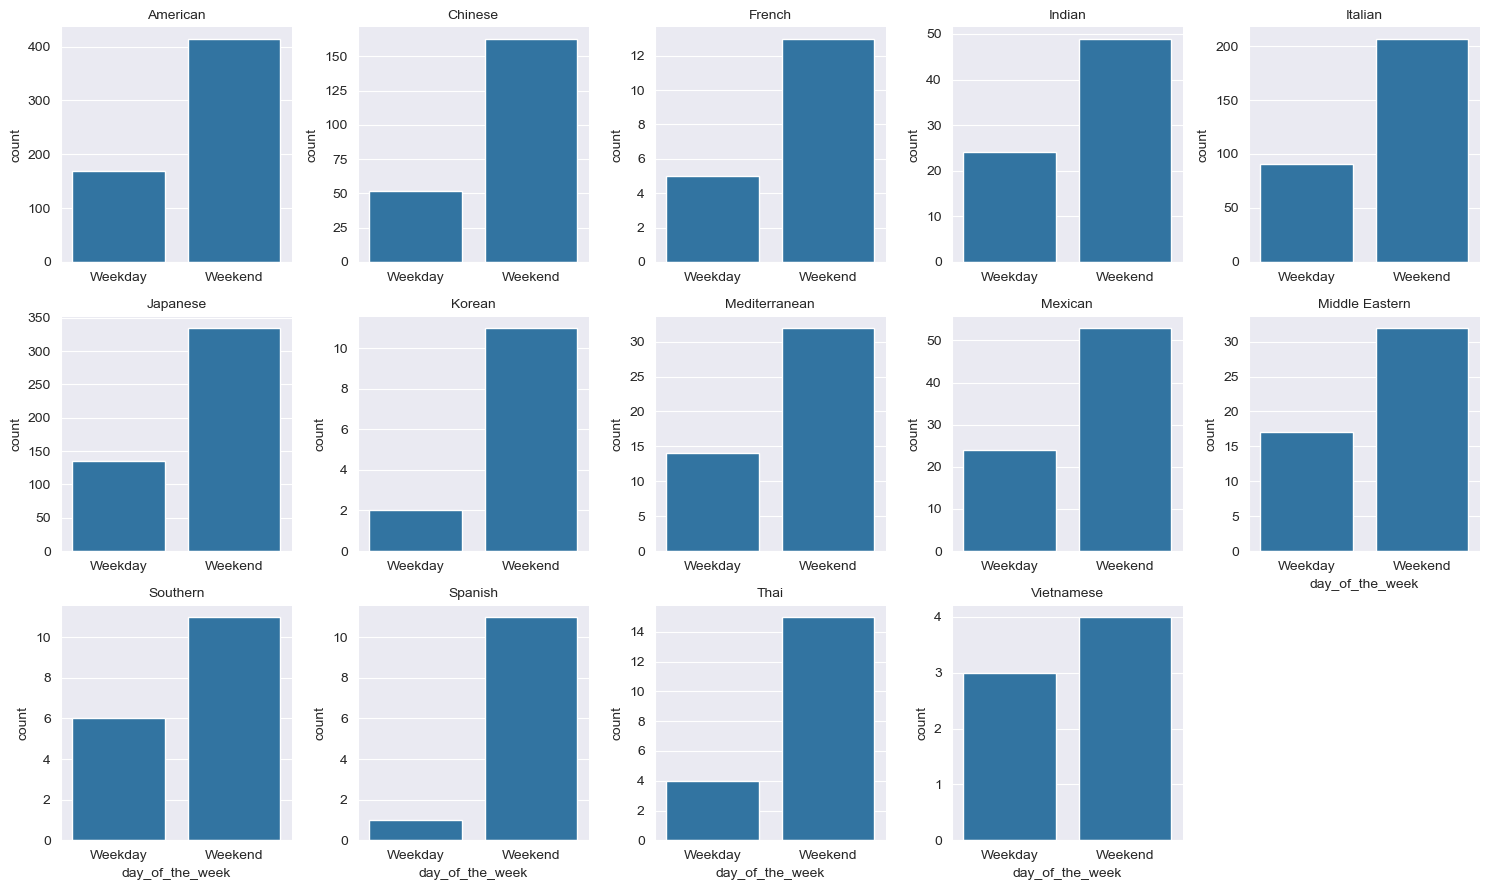

In [32]:
g = sns.FacetGrid(data=df, col='cuisine_type', sharex=False, sharey=False, col_wrap=5, col_order=cuisine_types)
g.set_titles(col_template="{col_name}")
g.map(sns.countplot, 'day_of_the_week', order=['Weekday', 'Weekend'])
plt.show()

It is across the board, for every cuisine, that most orders were placed during the weekend.

#### *Relationship between cuisine and cost of the order*

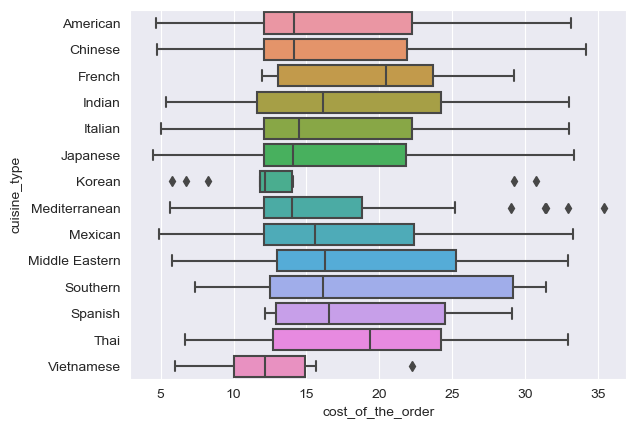

In [33]:
sns.boxplot(data=df, y='cuisine_type', x='cost_of_the_order', order=cuisine_types)
plt.show()

Looks like Southern food cost varies the most, while Korean food cost is quite consistent (although it does have some outliners). Vietnamese food is cheapest overall, and the price range is pretty tight as well.

#### *Relationship between cuisine and day of the week*

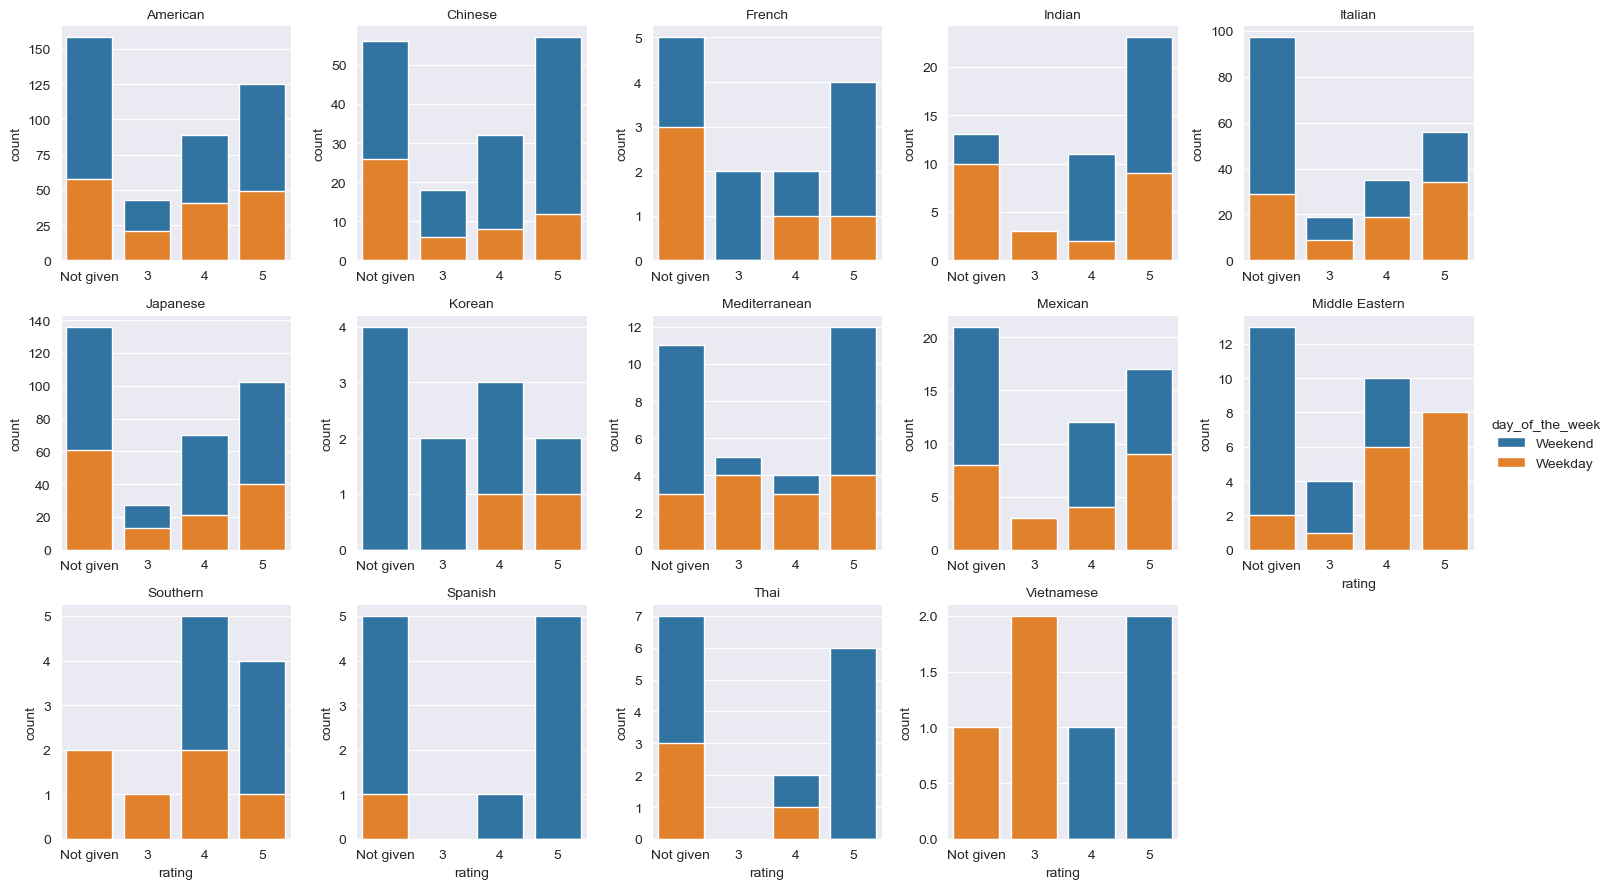

In [34]:
g = sns.FacetGrid(data=df, hue='day_of_the_week', col='cuisine_type', sharex=False, sharey=False, col_order=cuisine_types, col_wrap=5)
g.set_titles(col_template="{col_name}")
g.map(sns.countplot, 'rating', order=['Not given', '3', '4', '5'])
g.add_legend()
plt.show()

It does not seem to have a strong relationship between cuisine and rating, and no pattern regarding weekday / weekend emerge as well. However, it is interesting to note that for most cuisines, the number of orders with rating 3 is very low - except Vietnamese, which is the cheapest cuisine.

#### *Relationship between number of orders each restaurant has received and rating*

In [35]:
# restaurant versus number of orders: is there a relationship?

df["order_count_type"] = pd.cut(df.num_of_orders, bins=[0, 1, 10, 20, 50, 100, float("inf")], labels=['1', '2-10', '11-20', '21-50', '51-100', '100+'])

df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_num,num_of_orders,total_time,order_count_type
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN,2,45,2-10
1,1477600,347263,Hangawi,Korean,6.74,Weekend,Not given,21,22,NaN,2,43,2-10
2,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN,29,48,21-50
3,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,NaN,29,43,21-50
4,1477324,263426,Blue Ribbon Sushi Izakaya,Japanese,12.13,Weekday,5,30,29,5.0,29,59,21-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1477149,102710,Rye House,American,12.13,Weekday,4,26,30,4.0,1,56,1
1894,1477343,101957,Hiroko's Place,Japanese,13.05,Weekend,Not given,32,27,NaN,1,59,1
1895,1477910,39702,Frank Restaurant,Italian,12.08,Weekday,4,20,31,4.0,1,51,1
1896,1476843,361846,Sarabeth's West,American,14.12,Weekday,3,21,33,3.0,1,54,1


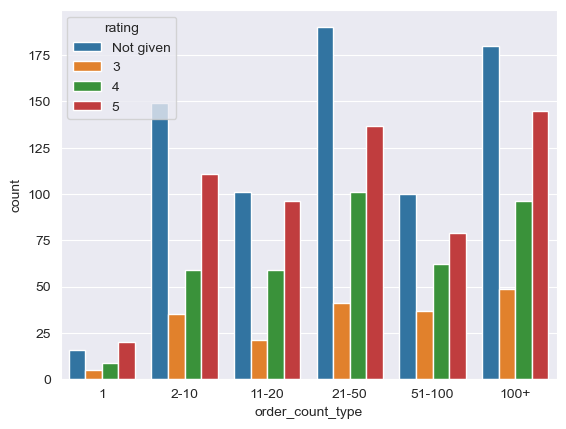

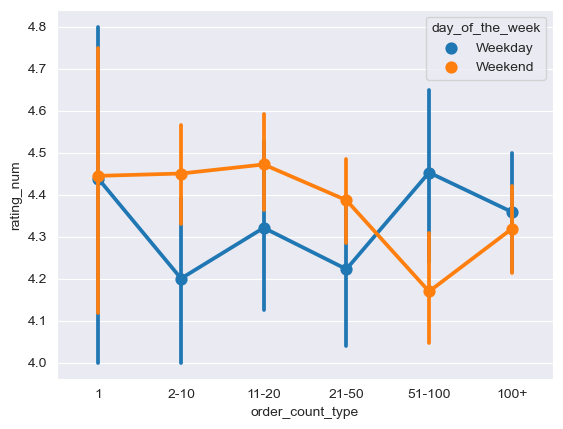

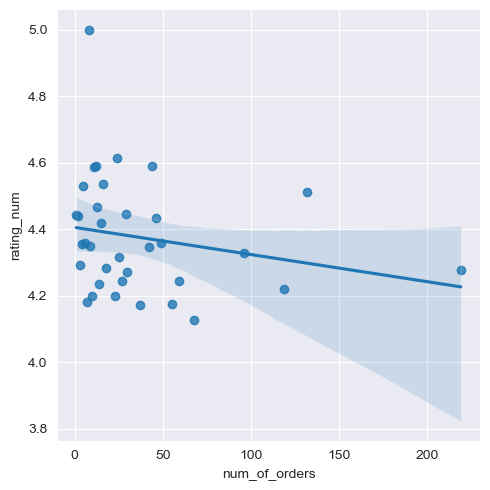

In [36]:
sns.countplot(data=df, x='order_count_type', hue='rating', hue_order=['Not given', '3', '4', '5'])
plt.show()
sns.pointplot(data=df.merge(restaurant_orders, left_on='restaurant_name', right_on='restaurant_name'), x='order_count_type', y='rating_num', hue='day_of_the_week', hue_order=['Weekday', 'Weekend'])
plt.show()
xyz = df.groupby(['num_of_orders'], as_index=False)['rating_num'].mean()
sns.lmplot(data=xyz, x='num_of_orders', y='rating_num')
plt.show()

It does not seem to have a strong relationship between number of orders and rating. However, it seems that rating for restaurants with fewer orders fare better during weekend, while ratings for restaurants with more orders fare better during weekdays.

#### *Relationship between rating and other variables*

<Axes: xlabel='rating', ylabel='cost_of_the_order'>

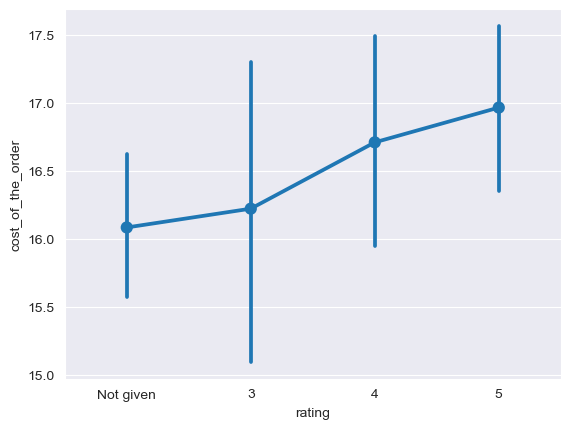

In [37]:
sns.pointplot(data=df, x='rating', y='cost_of_the_order', order=['Not given', '3', '4', '5'])

For rating = 3, the range of orders' cost is pretty wide. Versus, for rating = 5, the orders' cost seems to be higher in general. Perhaps because customers spent more money, they are either getting better service / quality, or the rating is higher as customers have bias towards their own spending.

<Axes: xlabel='rating', ylabel='food_preparation_time'>

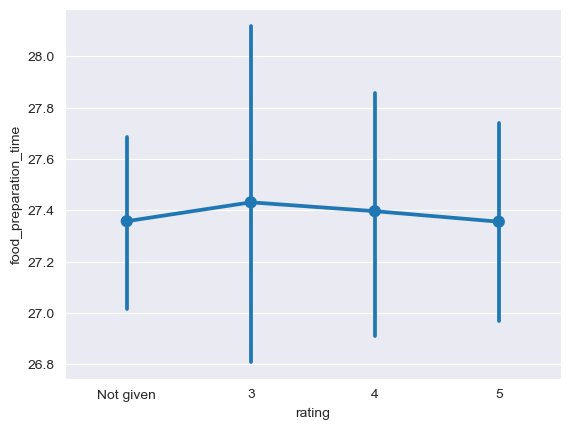

In [38]:
sns.pointplot(data=df, x='rating', y='food_preparation_time', order=['Not given', '3', '4', '5'])

<Axes: xlabel='rating', ylabel='delivery_time'>

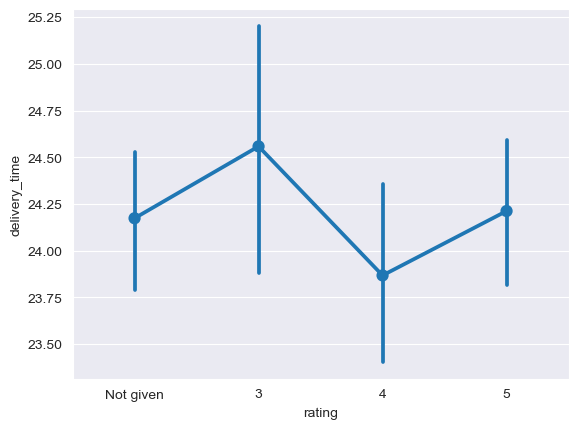

In [39]:
sns.pointplot(data=df, x='rating', y='delivery_time', order=['Not given', '3', '4', '5'])

Food preparation time seems not affecting the ratings much. However, lower ratings (e.g. rating = 3) seems to correlate with longer delivery time.

This is not surprising, as delivery takes longer, the food may have already cooled down and tastes worse.

At this rate, it seems that the usefulness of the rating data is limited, because:
1. A large portion of data is missing (38.78%)
2. The rating data is not correlated with other data, except for delivery time and perhaps a little bit with the cost of the order.

It would be much more useful if:
1. Not as many "Not given" ratings, and
2. if there can be some sort of breakdown in the ratings about the food quality, delivery time, etc.

#### *Relationship between cuisine and order fulfillment time (including both food preparation time and delivery time)*

In [40]:
time_analysis = df.melt(id_vars=['order_id', 'cuisine_type', 'day_of_the_week'], value_vars=['food_preparation_time', 'delivery_time'], var_name='time_type', value_name='time')
time_analysis.sort_values(by=['order_id', 'day_of_the_week']).head()

,order_id,cuisine_type,day_of_the_week,time_type,time
1409,1476547,American,Weekend,food_preparation_time,22
3307,1476547,American,Weekend,delivery_time,24
640,1476548,Japanese,Weekend,food_preparation_time,20
2538,1476548,Japanese,Weekend,delivery_time,30
161,1476549,Indian,Weekend,food_preparation_time,25


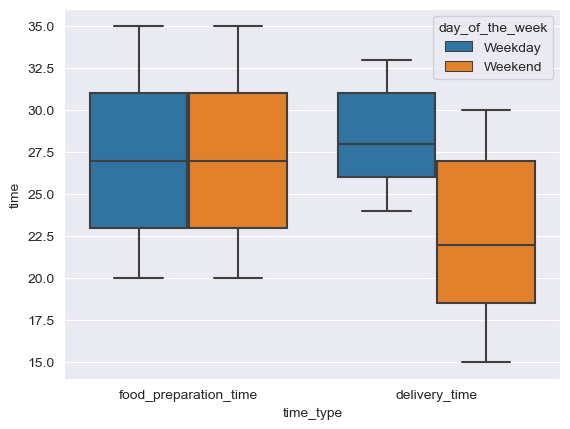

In [41]:
sns.boxplot(data=time_analysis, x='time_type', y='time', hue='day_of_the_week', hue_order=['Weekday', 'Weekend'])
plt.show()

Food preparation time does not differ between weekend and weekend; however, delivery time does. It takes longer to deliver food during the weekdays. Is there any difference when we look at individual cuisine?

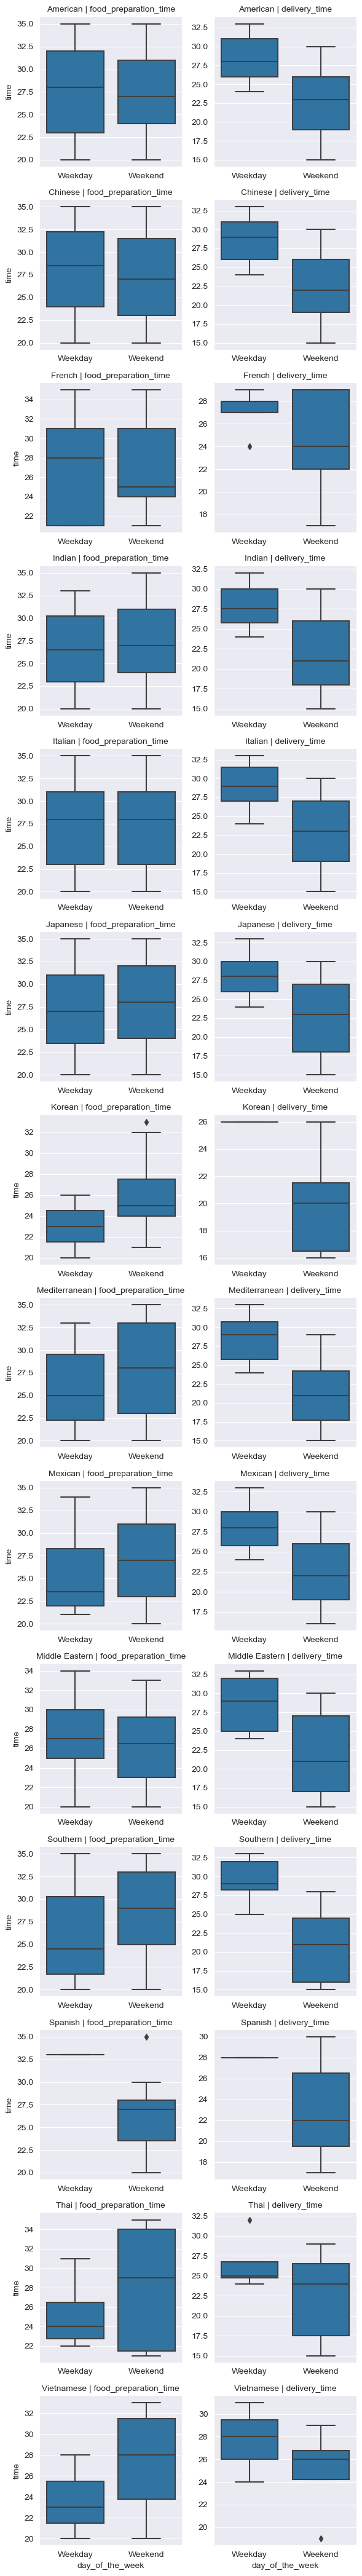

In [42]:
g = sns.FacetGrid(data=time_analysis, row='cuisine_type', sharex=False, sharey=False, row_order=cuisine_types, col='time_type', col_order=['food_preparation_time', 'delivery_time'])
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.map(sns.boxplot, 'day_of_the_week', 'time', order=['Weekday', 'Weekend'])
plt.show()

- Some cuisines take longer to prepare foods during weekend, which may be indicative about the volume of orders they receive.
- However, for delivery time, it is pretty consistent across all cuisines. Weekend delivery time is shorter than weekday delivery time.

#### *Revenue generated by each restaurant*

In [43]:
df_revenue = df.groupby(['restaurant_name']).agg(num_of_orders=('order_id', 'size'), total_revenue=('cost_of_the_order', 'sum'), avg_order_cost=('cost_of_the_order', 'mean'), avg_rating=('rating_num', 'mean')).sort_values(by=['num_of_orders'], ascending=False)
df_revenue

,num_of_orders,total_revenue,avg_order_cost,avg_rating
restaurant_name,,,,
Shake Shack,219,3579.53,16.344886,4.278195
The Meatball Shop,132,2145.21,16.251591,4.511905
Blue Ribbon Sushi,119,1903.95,15.999580,4.219178
Blue Ribbon Fried Chicken,96,1662.29,17.315521,4.328125
Parm,68,1112.76,16.364118,4.128205
...,...,...,...,...
Klong,1,29.05,29.050000,5.000000
Kambi Ramen House,1,32.93,32.930000,5.000000
Il Bambino,1,29.25,29.250000,4.000000


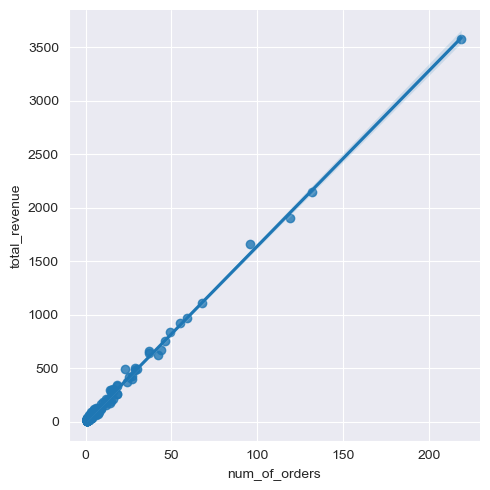

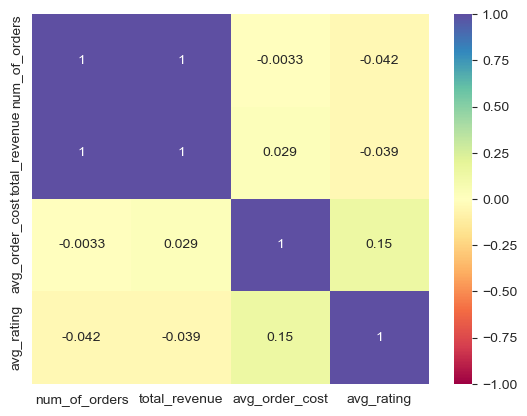

In [44]:
sns.lmplot(data=df_revenue, x='num_of_orders', y='total_revenue')
plt.show()
sns.heatmap(data=df_revenue.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

For each restaurant, the revenue generated through FoodHub definitely correlates with the number of orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [45]:
ratings = df[df.rating != 'Not given'].groupby(['restaurant_name']).agg(num_of_reviews=('rating_num', 'size'), rating_avg=('rating_num', 'mean'))
ratings[ratings.num_of_reviews > 50]

,num_of_reviews,rating_avg
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:

Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop all have more than 50 reviews, and their average ratings are greater than 4 anyways.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [46]:
# We can make a column for all order's app_cost, then add them together

app_cost_app = lambda x: x * 0.25 if x > 20 else (x * 0.15 if x > 5 else 0)

df['app_cost'] = df['cost_of_the_order'].apply(app_cost_app)

df['app_cost'].sum()

6166.303

#### Observations:

The company generated $6166.30 in revenue.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [47]:
orders_over_an_hour = df[df.total_time > 60]['order_id'].nunique()
print(f"There are {orders_over_an_hour} orders ({orders_over_an_hour / df['order_id'].nunique():.2%}) that take more than 60 minutes to get delivered.")

There are 200 orders (10.54%) that take more than 60 minutes to get delivered.


#### Observations:

About 10.54% of orders take more than 60 minutes to get prepared and delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [48]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:

For delivery, weekdays definitely takes a bit more time, averaging 28.34 minutes compared to 22.47 minutes on the weekends.It could be because traffic is bad during business hours. This is more convincing as most orders were placed during the weekends, so the delivery person could have more time in the weekdays to deliver the food.

However, we should also consider the destination of the orders, which, again it is missing. Generally speaking, in NYC, traffic around business areas (particularly Manhattan) is way worse during office hours than residential areas at any given time. And accessing office buildings during business hours requires going through security, which also takes time.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Data quality about customer ratings leaves a lot to be desired. There are many ratings simply missing (this is a valid choice).
* For rating, the only definitive correlation is with delivery time. The longer the delivery takes, the worse the rating is.
* Cuisine does not seem to be a significant direct factor with rating.
* There is a weak correlation between ratings and cost of the order.
* Utilization of FoodHub's platform is uneven. Some restaurants received a lot of orders via FoodHub, but for most restaurants, FoodHub is not their main delivery platform. This points to a user adoption issue (both restaurants and customers).
* Delivery time of FoodHub orders is a major issue. Some orders take a long time to be delivered, and those results in generally lower ratings, leading restaurants to be less inclined to use FoodHub.
* The current dataset does not have enough data points to provide insight regarding delivery time. Specifically, the current dataset does not have data points like order destination, delivery person and their received orders, etc.

### Recommendations:

*FoodHub's business*
 
* FoodHub should provide incentives to encourage restaurants using FoodHub more often. This can come as advertisement campaigns, discounts for the restaurants, etc.
* FoodHub should advertise itself among customers to increase exposure. If a restaurant has multiple delivery platform, customers are more inclined to use the ones they know already. FoodHub should also provide incentives to customers to use FoodHub more often.

*Delivery Time*

* FoodHub should study why delivery time is worse during weekdays even when order volume is smaller than weekends. Suggestion is to interview delivery persons for orders with long delivery time, to see if there is any pattern.
* To further aid the study of excessive delivery time, FoodHub should collect the destination of the orders, so that FoodHub can study the traffic pattern and see if there is any correlation between traffic and delivery time.
* It would be even better to collect the delivery person's location as well, as well as the orders each delivery person has received. That way, FoodHub can determine if the platform can optimize order assignment and delivery route for each delivery person, thus reducing the delivery time.

---